# Выпускной проект

Цель: проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.

План
- Загрузка данных
- Предобработка
- Исследование данных
- Проверка гипотез
- Составление промежуточного вывода о показателях влияющих на отток
- Сегментация на основе предыдущего пункта
- Выводы и рекомендации по сегментам для заказчика

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
sns.set_palette('viridis')

In [2]:
data = pd.read_csv('/datasets/bank_scrooge.csv')
display(data.info())
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


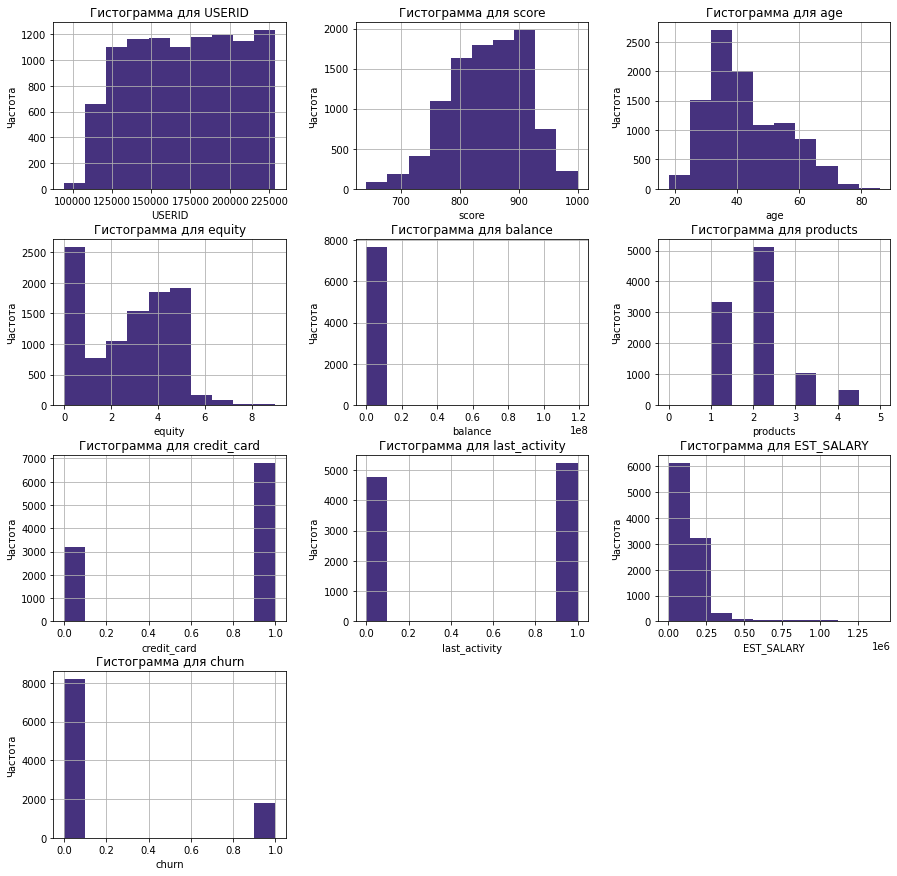

In [3]:
axes = data.hist(figsize=(15, 15))
for ax in axes.flatten():
    ax.set_xlabel(ax.get_title())
    ax.set_ylabel('Частота')  
    ax.set_title(f'Гистограмма для {ax.get_title()}')

In [4]:
data.isna().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

Вывод: В полученных данных есть пустые значения. Названия столбцов следует привести к нижнему регистру. Встречаются выбросы.

## Предобработка

In [5]:
data.columns = data.columns.str.lower()

Приводим названия столбцов к нижнему регистру.

In [6]:
data = data.dropna(subset=['age'])

Пропусков всего 26. Смело избавляемся от них.

In [7]:
data[['userid', 'age', 'gender']].duplicated().sum()

2

In [8]:
data = data.loc[data[['userid', 'age', 'gender']].duplicated()==False]

In [9]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

Обнаружено 2 дупликата. Удалим их.

In [10]:
display(data['age'].max())
display(data['age'].min())

86.0

18.0

Аномалий не обнаружено.

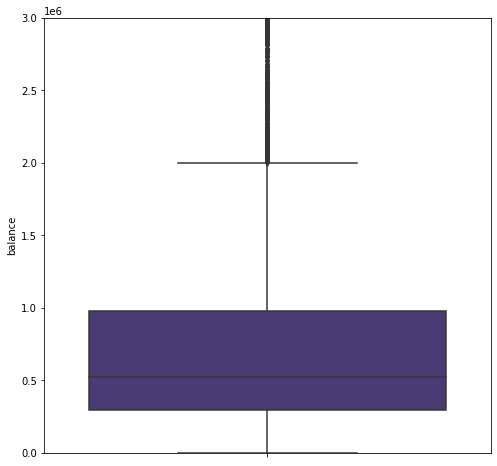

In [11]:
plt.figure(figsize=(8, 8))
balance_boxplot = sns.boxplot(y='balance', data=data)
balance_boxplot.set_ylim(0, 3000000);

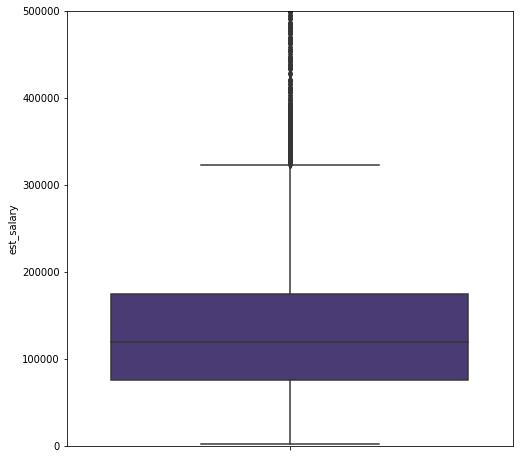

In [12]:
plt.figure(figsize=(8, 8))
salary_boxplot = sns.boxplot(y='est_salary', data=data)
salary_boxplot.set_ylim(0, 500000);

Встречаются выбросы в столбцах с доходом и балансом.

Вывод: Встретились пропуски в возрасте и в балансе на счету. Удалили пропуски для возраста, а баланс не трогаем, чтобы не исказить данные. Удалили 2 дупликата. Аномалии не обнаружены.

## Исследование данных

### Гистограммы распределения плотности вероятности

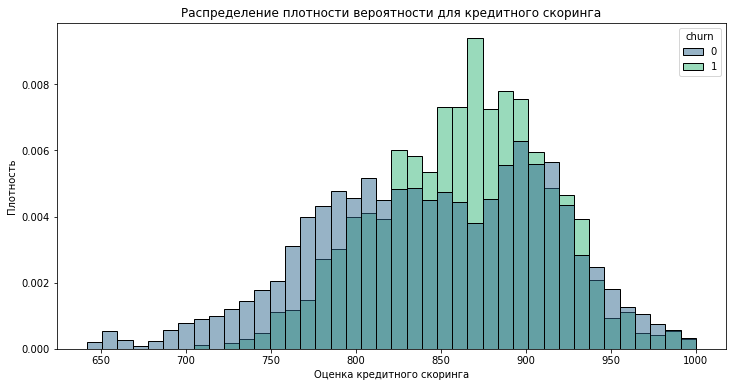

In [13]:
plt.figure(figsize=(12, 6))
score_hist = sns.histplot(data=data, x='score', hue='churn', stat='density', common_norm=False, palette='viridis')
score_hist.set_title('Распределение плотности вероятности для кредитного скоринга')
score_hist.set_ylabel('Плотность')
score_hist.set_xlabel('Оценка кредитного скоринга');

Вывод: Более склонны к уходу клиенты, у которых оценка кредитного скоринга от 820 до 940. Пик достигается примерно на 860.

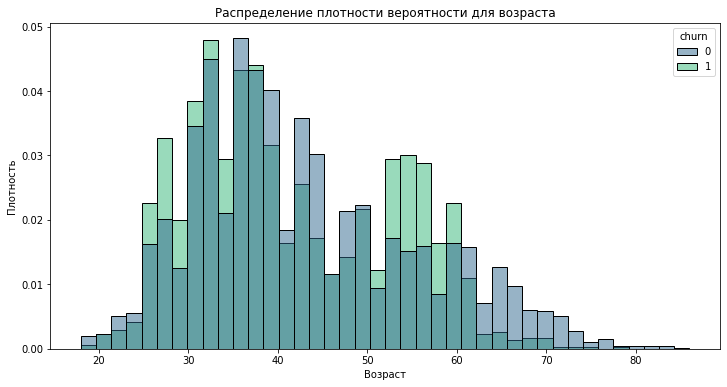

In [14]:
plt.figure(figsize=(12, 6))
age_hist = sns.histplot(data=data, x='age', hue='churn', stat='density',\
                        bins=40, common_norm=False, palette='viridis')
age_hist.set_title('Распределение плотности вероятности для возраста')
age_hist.set_ylabel('Плотность')
age_hist.set_xlabel('Возраст');

Вывод: Клиенты от 25 до 35 и от 50 до 60, чаще уходят из банка.

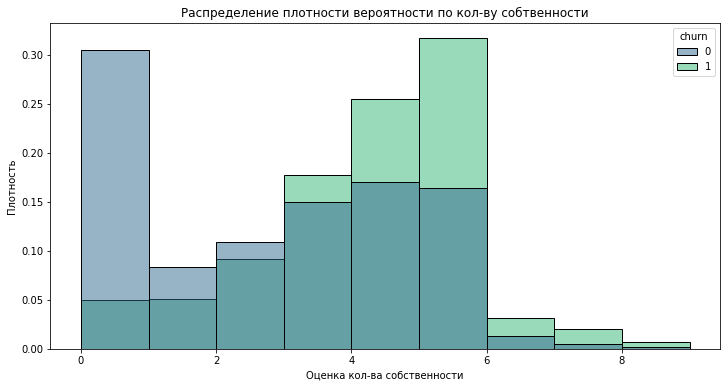

In [15]:
plt.figure(figsize=(12, 6))
equity_hist = sns.histplot(data=data, x='equity', hue='churn', stat='density',\
                           bins=9, common_norm=False, palette='viridis')
equity_hist.set_title('Распределение плотности вероятности по кол-ву собтвенности')
equity_hist.set_ylabel('Плотность')
equity_hist.set_xlabel('Оценка кол-ва собственности');

Вывод: При оценке кол-ва собственности от 3 вероятность ухода клиента больше.

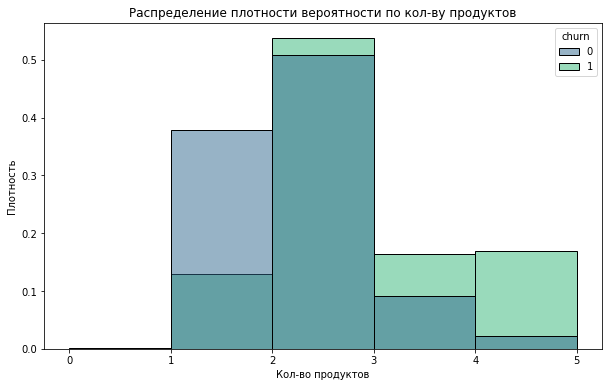

In [16]:
plt.figure(figsize=(10, 6))
products_hist = sns.histplot(data=data, x='products', hue='churn', stat='density',\
                             bins=5, common_norm=False, palette='viridis')
products_hist.set_title('Распределение плотности вероятности по кол-ву продуктов')
products_hist.set_ylabel('Плотность')
products_hist.set_xlabel('Кол-во продуктов');

Вывод: При оценке кол-ва продуктов от 2 вероятность ухода клиента больше.

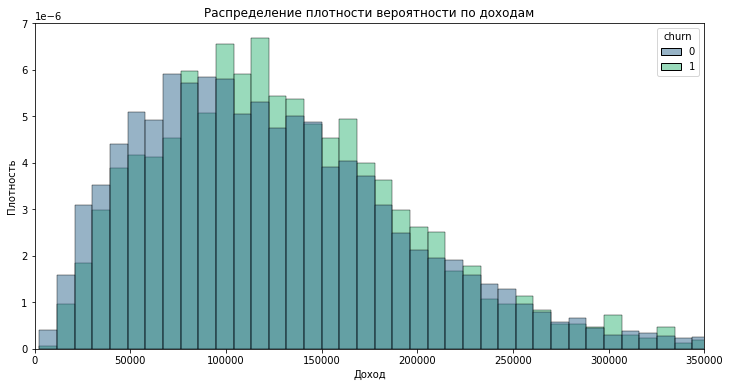

In [17]:
plt.figure(figsize=(12, 6))
salary_hist = sns.histplot(data=data, x='est_salary', hue='churn',\
                            stat='density', common_norm=False, palette='viridis')
salary_hist.set_title('Распределение плотности вероятности по доходам')
salary_hist.set_ylabel('Плотность')
salary_hist.set_xlabel('Доход')
salary_hist.set_xlim(0, 350000);

Вывод: При доходе от 100тыс.р. клиенты более склоны к уходу.

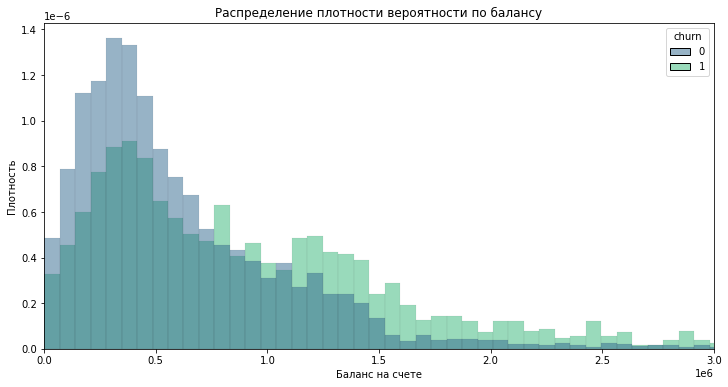

In [18]:
balance_data = data.query('balance >= 0')

plt.figure(figsize=(12, 6))
balance_hist = sns.histplot(data=balance_data, x='balance', hue='churn',\
                            stat='density', common_norm=False, palette='viridis')
balance_hist.set_title('Распределение плотности вероятности по балансу')
balance_hist.set_ylabel('Плотность')
balance_hist.set_xlabel('Баланс на счете')
balance_hist.set_xlim(0, 3000000);

Вывод: При балансе на счете от 700тыс.р. клиенты более склоны к уходу.

### Корреляционная матрица

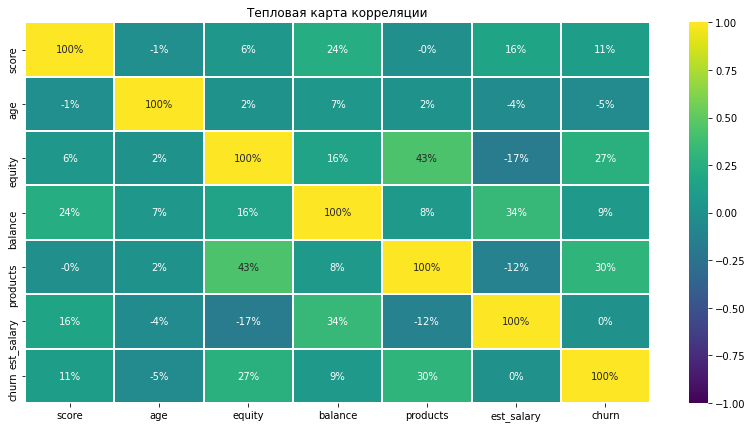

In [19]:
data_corr = data.drop(['userid', 'city', 'gender', 'credit_card', 'last_activity'], axis=1)

plt.figure(figsize=(14, 7))
sns.heatmap(data=data_corr.corr(), annot=True, fmt='.0%', linewidths=1, vmin=-1, vmax=1, cmap='viridis')
plt.title('Тепловая карта корреляции');

Вывод: Средняя зависимость наблюдается между кол-вом собственности и кол-вом продуктов клиента (43%). Есть довольно слабая зависимость между кол-вом продуктов и оттоком, кол-вом собственности и оттоком (27% и 30% соответственно).

<b>Общий вывод:</b> В основном чем больше у клиентов доходов, имущества, баланса и продуктов тем больше шанс, что он уйдет. Также высокий процент ухода у пользователей с кредитным скорингом от 820 до 940 и возрастом от 25 до 35 и от 50 до 60.
Есть небольшая зависимость между кол-вом продуктов и оттоком (27%), кол-вом собственности и оттоком (30%).

## Проверка гипотез

### Первая гипотеза: Различие дохода между ушедшими клиентами и оставшимися

Нулевая гипотеза: разницы между ушедшими клиентами и оставшимися в доходах нет. Альтернативная гипотеза: разница есть.

In [20]:
left_data = data.query('churn == 1')
stayed_data = data.query('churn == 0')

In [21]:
alpha = 0.05
salary_results = st.ttest_ind(left_data['est_salary'], stayed_data['est_salary'])
print('p-value:', salary_results.pvalue)
if salary_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.8667175285359087
Нет оснований отвергнуть нулевую гипотезу


### Вторая гипотеза: Различие баланса между ушедшими клиентами и оставшимися

Нулевая гипотеза: разницы между ушедшими клиентами и оставшимися в балансе нет. Альтернативная гипотеза: разница есть.

In [22]:
left_balance_data = balance_data.query('churn == 1')
stayed_balance_data = balance_data.query('churn == 0')

In [23]:
alpha = 0.05
balance_results = st.ttest_ind(stayed_balance_data['balance'], left_balance_data['balance'])
print('p-value:', balance_results.pvalue)
if balance_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 4.441165423249354e-14
Отвергаем нулевую гипотезу


<b>Общий вывод:</b> Первую гипотезу мы не отвергаем, поэтому есть основания говорить, что доходы не отличаются. Вторую же гипотезу отклоняем в пользу альтернативной, что дает право говорить, что баланс у оставшихся клиентов отличается от ушедших.

## Промежуточный вывод о показателях влияющих на отток

Основными показателями влияющих на отток можно считать: баланс на счете, доход, кол-во имущества и продуктов банка, а также возраст. Клиенты от 25 до 35 и от 50 до 60, чаще уходят из банка. При доходе от 100 тыс.р. и балансе от 700 тыс.р. клиенты более склоны к уходу. При оценке кол-ва продуктов от 2 и оценке кол-ва собственности от 3 вероятность ухода клиента выше. Также можно сегментировать по полу и городу.

## Сегментация

Будем считать, что если в сегменте больше 30% клиентов ушло, то это нужный нам сегмент.

In [24]:
def city_seg(df):
    for city in df['city'].unique():
        if df[df['city'] == city]['churn'].mean() > 0.3 and len(df[df['city'] == city]) > 500:
            print('Сегмент', city, df[df['city'] == city]['churn'].mean(), len(df[df['city'] == city]))

In [25]:
def gender_seg(df):
    for gender in df['gender'].unique():
        if df[df['gender'] == gender]['churn'].mean() > 0.3 and len(df[df['gender'] == gender]) > 500:
            print('Сегмент', gender, df[df['gender'] == gender]['churn'].mean(), len(df[df['gender'] == gender]))

In [26]:
def seg(df):
    if df['churn'].mean() > 0.3 and len(df) > 500:
        print('Нужный сегмент:', df['churn'].mean(), len(df))

Добавили функции для упрощения

### Баланс

In [27]:
seg(data.query('balance > 700000 and est_salary > 100000'))

Нужный сегмент: 0.39737108190091003 1978


In [28]:
seg(data.query('balance > 700000 and equity > 2'))

Нужный сегмент: 0.34741606940777064 2651


In [29]:
seg(data.query('balance > 700000 and products >= 2')) 

Нужный сегмент: 0.3637440758293839 2532


In [30]:
seg(data.query('balance > 700000 and (25 <= age <= 35 or 50 <= age <= 60)'))

Нужный сегмент: 0.45577211394302847 1334


In [31]:
seg(data.query('balance > 700000 and (820 <= score <= 940)'))

Нужный сегмент: 0.4019704433497537 2030


In [32]:
city_seg(data.query('balance > 700000'))

Сегмент Ярославль 0.3730747290359384 1753


In [33]:
gender_seg(data.query('balance > 700000'))

Сегмент М 0.4434544208361892 1459


Ключевые сегменты для баланса на счете от 700 тыс.р.:
- доход от 100 тыс.р. (40%)
- оценка кол-ва имущества от 3 (35%)
- оценка кол-ва продуктов от 2 (36%)
- возраст 25-35 и 50-60 (46%)
- кредитный скоринг (40%)
- города: Ярославль и Ростов (37% и 32%)
- мужчины (44%)

### Доход

In [34]:
seg(data.query('est_salary > 100000 and equity > 2'))

Нужный сегмент: 0.322099805573558 3086


In [35]:
seg(data.query('est_salary > 100000 and products >= 2'))

In [36]:
seg(data.query('est_salary > 100000 and (25 <= age <= 35 or 50 <= age <= 60)'))

In [37]:
seg(data.query('est_salary > 100000 and (820 <= score <= 940)'))

In [38]:
city_seg(data.query('est_salary > 100000'))

In [39]:
gender_seg(data.query('est_salary > 100000'))

Ключевые сегменты для дохода от 100 тыс.р.:
- баланс от 700 тыс.р. (40%)
- оценка кол-ва имущества от 3 (32%)

### Кол-во имущества

In [40]:
seg(data.query('equity > 2 and products >= 2'))

In [41]:
seg(data.query('equity > 2 and (25 <= age <= 35 or 50 <= age <= 60)'))

Нужный сегмент: 0.3392727272727273 2750


In [42]:
seg(data.query('equity > 2 and (820 <= score <= 940)'))

Нужный сегмент: 0.3274725274725275 3640


In [43]:
city_seg(data.query('equity > 2'))

In [44]:
gender_seg(data.query('equity > 2'))

Сегмент М 0.3547322083639032 2726


Ключевые сегменты для оценки кол-ва имущества от 3:
- доход от 100 тыс.р. (32%)
- возраст 25-35 и 50-60 (34%)
- кредитный скоринг (32%)
- мужчины (35%)

### Кол-во продуктов

In [45]:
seg(data.query('products >= 2 and (25 <= age <= 35 or 50 <= age <= 60)'))

Нужный сегмент: 0.3045078196872125 3261


In [46]:
seg(data.query('products >= 2 and (820 <= score <= 940)'))

Нужный сегмент: 0.30499122146977675 3987


In [47]:
city_seg(data.query('products >= 2'))

In [48]:
gender_seg(data.query('products >= 2'))

Сегмент М 0.3168440826549781 3194


Ключевые сегменты для оценки кол-ва продуктов банка от 2:
- баланс от 700 тыс.р. (36%)
- возраст 25-35 и 50-60 (30%)
- кредитный скоринг (30%)
- мужчины (31%)

### Возраст

In [49]:
seg(data.query('(25 <= age <= 35 or 50 <= age <= 60) and (820 <= score <= 940)'))

In [50]:
city_seg(data.query('25 <= age <= 35 or 50 <= age <= 60'))

In [51]:
gender_seg(data.query('25 <= age <= 35 or 50 <= age <= 60'))

Ключевые сегменты для возраста:
- баланс от 700 тыс.р. (46%)
- оценка кол-ва имущества от 3 (35%)
- оценка кол-ва продуктов от 2 (36%)

## Выводы и рекомендации

Нужно было проанализировать клиентов банка и выделить сегменты склонных уходить клиентов. В полученных данных встретились пустые значения, которые не трогали, чтобы ничего не исказить. Также выяснилось, что в основном чем больше у клиента доходов, имущества, баланса и продуктов тем больше шанс, что он уйдет. Также часто уходят пользователи с кредитным скорингом от 820 до 940 и возрастом 25-35 и от 50 до 60. Основные потери клиентов видны во всех сегментах, связанных с балансом от 700 тыс.р. Возможно пользователей не устраивает, что их баланс простаивает, возможно нет каких-либо интересных предложений по вкладам и т.д. Также высокие показатели у сегментов, связанных с кол-вом продуктов и имуществом. Возможно здесь такая же проблема, клиенты недовольны качеством продуктов.

# Ссылка на презентацию

Презентация: https://disk.yandex.ru/i/XCJjdctSIg5qLg